In [18]:
%matplotlib inline 
import pylab
import pandas as pd 
import numpy as np

from skimage.io import imread, imsave
from skimage import img_as_float

from sklearn.cluster import KMeans

In [4]:
image = imread('parrots.jpg')

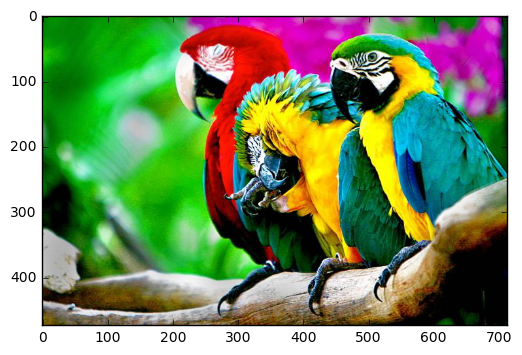

In [7]:
pylab.imshow(image)

In [9]:
Array = img_as_float(image)

In [10]:
(m,w,n) = Array.shape

In [15]:
pixels = pd.DataFrame(np.reshape(Array,((m*w),n)), columns=['R', 'G', 'B'])

In [16]:
pixels.head(2)

,R,G,B
0,0.015686,0.494118,0.019608
1,0.007843,0.494118,0.007843


In [29]:
'''
    3. Запустите алгоритм K-Means с параметрами init='k-means++' и 
    random_state=241. После выделения кластеров все пиксели, отнесенные 
    в один кластер, попробуйте заполнить двумя способами: медианным и 
    средним цветом по кластеру.
'''

def clustering(pixels, n_clusters=8):
    print(n_clusters)
    
    pixels = pixels.copy()
    model = KMeans(n_clusters=n_clusters, init= 'k-means++', random_state=241)
    pixels['cluster'] = model.fit_predict(pixels)
    
    means = pixels.groupby('cluster').mean().values
    mean_pixels = [means[c] for c in pixels['cluster'].values]
    mean_image = np.reshape(mean_pixels, (m,w,n))
    imsave('mean_parrots_'+str(n_clusters)+'.jpg', mean_image)
    
    medians = pixels.groupby('cluster').median().values
    medians_pixels = [medians[c] for c in pixels['cluster'].values]
    medians_image = np.reshape(medians_pixels, (m,w,n))
    imsave('medians_parrots_'+str(n_clusters)+'.jpg', medians_image)
    
    return mean_image, medians_image

In [36]:
'''
    4. Измерьте качество получившейся сегментации с помощью метрики PSNR. 
    Эту метрику нужно реализовать самостоятельно (см. определение).
'''

def PSNR(true_image, predict_image):
    MSE = np.mean((true_image - predict_image)**2)
    
    return 10*np.log10(1./MSE)

In [41]:
'''
    5. Найдите минимальное количество кластеров, при котором значение PSNR выше 20 (можно рассмотреть не более 20
    кластеров, но не забудьте рассмотреть оба способа заполнения пикселей одного кластера). Это число и будет
    ответом в данной задаче.
'''

for i in range(1,21):
    Mean_image, Median_image = clustering(pixels=pixels, n_clusters=i)
    Psnr_mean, Psnr_median = PSNR(Array, Mean_image), PSNR(Array, Median_image)
    
    print(Psnr_mean, Psnr_median)
    
    if Psnr_mean > 20 or Psnr_median > 20:
        print(i)

1


C:\Program Files\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: mean_parrots_1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Program Files\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
C:\Program Files\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: medians_parrots_1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


9.81883093501 9.42783692953
2
12.0801700391 11.6550725118
3
13.1534766629 12.7749398473
4
14.3678118307 14.006389945
5
15.5271906521 15.1744507957
6
16.5439941299 16.0511785909
7
17.6409899432 17.3393662067
8
18.4368274969 18.1379726405
9
19.1126630528 18.8128478205
10
19.6407755865 19.4178205055
11
20.1275905867 19.8412892627
11
12


KeyboardInterrupt: 

In [43]:
model = KMeans(init= 'k-means++', random_state=241)
pixels['cluster'] = model.fit_predict(pixels)

In [44]:
pixels.groupby('cluster').mean().values

array([[ 0.05398472,  0.11669148,  0.05040297],
       [ 0.78777653,  0.82313186,  0.797932  ],
       [ 0.95426915,  0.82763499,  0.04108553],
       [ 0.45195586,  0.66671243,  0.44141216],
       [ 0.09564693,  0.63556753,  0.06691699],
       [ 0.61234112,  0.21470903,  0.06361929],
       [ 0.77703777,  0.09104954,  0.69018671],
       [ 0.04566487,  0.55159844,  0.59899031]])